# 🎓 Student Enrollment Evolution at the National University of Engineering (2017-2023)

An analysis of how student enrollment has evolved at Universidad Nacional de Ingeniería (UNI) by faculties and degree programs using open data from Peru's National Open Data Platform (PNDA).

## 📋 Description

**Objective:** Analyze the evolution of student enrollment by faculties and degree programs at the National University of Engineering (Universidad Nacional de Ingeniería - UNI) from 2017 to 2023.

**Data Source:** PNDA Peru (Plataforma Nacional de Datos Abiertos) - Peru's National Open Data Platform

**Key Questions:**
- How has overall enrollment changed over time? 📈
- Which faculties have experienced growth or decline? 🏗️
- What trends can we observe across different degree programs? 🔍

## 📦 Install Required Packages

Installing the necessary Python packages for data analysis and visualization.

In [9]:
!pip install requests pandas matplotlib seaborn plotly openpyxl --quiet

## 📚 Import Libraries

Importing all required libraries for data processing, analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
import warnings

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 🔍 Load Dataset from PNDA Peru

Loading the UNI enrollment dataset covering 2016-1 to 2024-1 periods, which includes our target timeframe (2017-2023).

In [2]:
# Load the main enrollment dataset
data_url = "https://datosabiertos.gob.pe/sites/default/files/Datos_abiertos_matriculas_2016_1_2024_1.csv"

print("🔄 Loading enrollment data...")
try:
    df = pd.read_csv(data_url, encoding='utf-8')
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(data_url, encoding='latin1')
        print(f"✅ Data loaded successfully with latin1 encoding! Shape: {df.shape}")
    except Exception as e:
        print(f"❌ Error loading data: {e}")

# Display basic information about the dataset
print(f"\n📊 Dataset Overview:")
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")
print(f"\n📋 Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

🔄 Loading enrollment data...
✅ Data loaded successfully! Shape: (192389, 21)

📊 Dataset Overview:
   Rows: 192,389
   Columns: 21

📋 Column names:
   1. IDHASH
   2. COLEGIO_DEPA
   3. COLEGIO_PROV
   4. COLEGIO_DIST
   5. ANIO
   6. PERIODO
   7. TIPO_MATRICULA
   8. DOMICILIO_DEPA
   9. DOMICILIO_PROV
   10. DOMICILIO_DIST
   11. ANIO_NACIMIENTO
   12. NACIMIENTO_PAIS
   13. NACIMIENTO_DEPA
   14. NACIMIENTO_PROV
   15. NACIMIENTO_DIST
   16. SEXO
   17. MODALIDAD
   18. METODOLOGIA
   19. FACULTAD
   20. ESPECIALIDAD
   21. CICLO_RELATIVO


## 🔬 Explore Dataset Structure

Understanding the data structure and preparing for analysis.

In [12]:
# Display first few rows to understand the data structure
print("📋 First 5 rows of the dataset:")
print(df.head())

print(f"\n📊 Data types:")
print(df.dtypes)

# Check for any missing values
print(f"\n❓ Missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

# Display unique values for key categorical columns
if 'PERIODO' in df.columns:
    print(f"\n📅 Available periods: {sorted(df['PERIODO'].unique())}")
if 'FACULTAD' in df.columns:
    print(f"\n🏛️ Faculties ({len(df['FACULTAD'].unique())} total):")
    faculties = df['FACULTAD'].unique()
    for i, faculty in enumerate(sorted(faculties), 1):
        print(f"   {i}. {faculty}")
        
# Show sample data to understand structure better
print(f"\n🔍 Sample data:")
print(df.sample(3))

📋 First 5 rows of the dataset:
                                              IDHASH COLEGIO_DEPA  \
0  07E35E858686718757529DDDBEC110B0B39CA2FCC810A6...         LIMA   
1  24DAB8EC1FDFA72428AF843FFABB4901743386A9EBD0A1...         LIMA   
2  0FD5293AAD1655B7FBF28920796B1C49144F4B7F3BEA24...         LIMA   
3  5B07CA8222FAB9610D2B3C0D3789CAF1103479F47ACA8E...       ÁNCASH   
4  FF657E45CD5AE985DCDF4E3C7B5CCA17F90056F075473C...         LIMA   

         COLEGIO_PROV       COLEGIO_DIST  ANIO  PERIODO TIPO_MATRICULA  \
0  LIMA METROPOLITANA         LURIGANCHO  2016        1      Regulares   
1  LIMA METROPOLITANA                ATE  2016        1      Regulares   
2  LIMA METROPOLITANA  VILLA EL SALVADOR  2016        1      Regulares   
3             CARHUAZ            CARHUAZ  2016        1      Regulares   
4  LIMA METROPOLITANA         CARABAYLLO  2016        1      Regulares   

  DOMICILIO_DEPA      DOMICILIO_PROV           DOMICILIO_DIST  ...  \
0           LIMA  LIMA METROPOLITANA   

## 📈 Analyze Enrollment Evolution by Faculty and Degree Program (2017-2023)

Filtering and analyzing the enrollment data for our target period to understand trends by faculty and degree programs.

In [3]:
# First, let's check the period format
print("🔍 Sample PERIODO values:")
print(df['PERIODO'].unique()[:10])

# Extract year from ANIO column instead (which seems to be the year column)
if 'ANIO' in df.columns:
    df['YEAR'] = df['ANIO'].astype(int)
else:
    # Fallback: extract year from PERIODO if it contains year info
    df['YEAR'] = df['PERIODO'].astype(str).str[:4].astype(int)

print(f"\n📅 Available years in dataset: {sorted(df['YEAR'].unique())}")

# Filter data for our target period (2017-2023)
target_years = range(2017, 2024)
df_filtered = df[df['YEAR'].isin(target_years)].copy()

print(f"🎯 Filtered data for years 2017-2023:")
print(f"   Total records: {len(df_filtered):,}")
print(f"   Years covered: {sorted(df_filtered['YEAR'].unique())}")

# Analyze enrollment by year
yearly_enrollment = df_filtered.groupby('YEAR').size().reset_index(name='Total_Enrollment')
print(f"\n📊 Total Enrollment by Year:")
for _, row in yearly_enrollment.iterrows():
    print(f"   {row['YEAR']}: {row['Total_Enrollment']:,} students")

# Calculate percentage change year over year
yearly_enrollment['Pct_Change'] = yearly_enrollment['Total_Enrollment'].pct_change() * 100
print(f"\n📈 Year-over-Year Growth:")
for _, row in yearly_enrollment.iterrows():
    if not pd.isna(row['Pct_Change']):
        change_icon = "📈" if row['Pct_Change'] > 0 else "📉"
        print(f"   {row['YEAR']}: {row['Pct_Change']:.1f}% {change_icon}")

# Enrollment by Faculty and Year
faculty_yearly = df_filtered.groupby(['FACULTAD', 'YEAR']).size().reset_index(name='Enrollment')
faculty_summary = df_filtered.groupby('FACULTAD').size().reset_index(name='Total_Students').sort_values('Total_Students', ascending=False)

print(f"\n🏛️ Total Enrollment by Faculty (2017-2023):")
for _, row in faculty_summary.iterrows():
    print(f"   {row['FACULTAD']}: {row['Total_Students']:,} students")

# If there's a degree program column, analyze by program
program_columns = [col for col in df.columns if any(word in col.upper() for word in ['CARRERA', 'PROGRAMA', 'ESPECIALIDAD'])]
if program_columns:
    program_col = program_columns[0]
    program_yearly = df_filtered.groupby([program_col, 'YEAR']).size().reset_index(name='Enrollment')
    top_programs = df_filtered.groupby(program_col).size().reset_index(name='Total_Students').sort_values('Total_Students', ascending=False).head(10)
    
    print(f"\n🎓 Top 10 Degree Programs by Total Enrollment (2017-2023):")
    for i, row in top_programs.iterrows():
        print(f"   {i+1}. {row[program_col]}: {row['Total_Students']:,} students")
else:
    print(f"\n⚠️ No specific degree program column found in the dataset")

🔍 Sample PERIODO values:
[1 2]

📅 Available years in dataset: [np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
🎯 Filtered data for years 2017-2023:
   Total records: 160,836
   Years covered: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]

📊 Total Enrollment by Year:
   2017: 24,033 students
   2018: 23,155 students
   2019: 23,863 students
   2020: 23,534 students
   2021: 22,565 students
   2022: 21,551 students
   2023: 22,135 students

📈 Year-over-Year Growth:
   2018.0: -3.7% 📉
   2019.0: 3.1% 📈
   2020.0: -1.4% 📉
   2021.0: -4.1% 📉
   2022.0: -4.5% 📉
   2023.0: 2.7% 📈

🏛️ Total Enrollment by Faculty (2017-2023):
   INGENIERÍA MECÁNICA: 22,619 students
   INGENIERÍA CIVIL: 20,706 students
   INGENIERÍA INDUSTRIAL Y DE SISTEMAS: 20,671 students
   INGENIERÍA ELÉCTRICA Y ELECTRÓNICA: 20,553 students
   CIENCIAS: 14,429 stud

## 📊 Visualize Enrollment Trends

Creating visualizations to better understand enrollment patterns and trends over time.

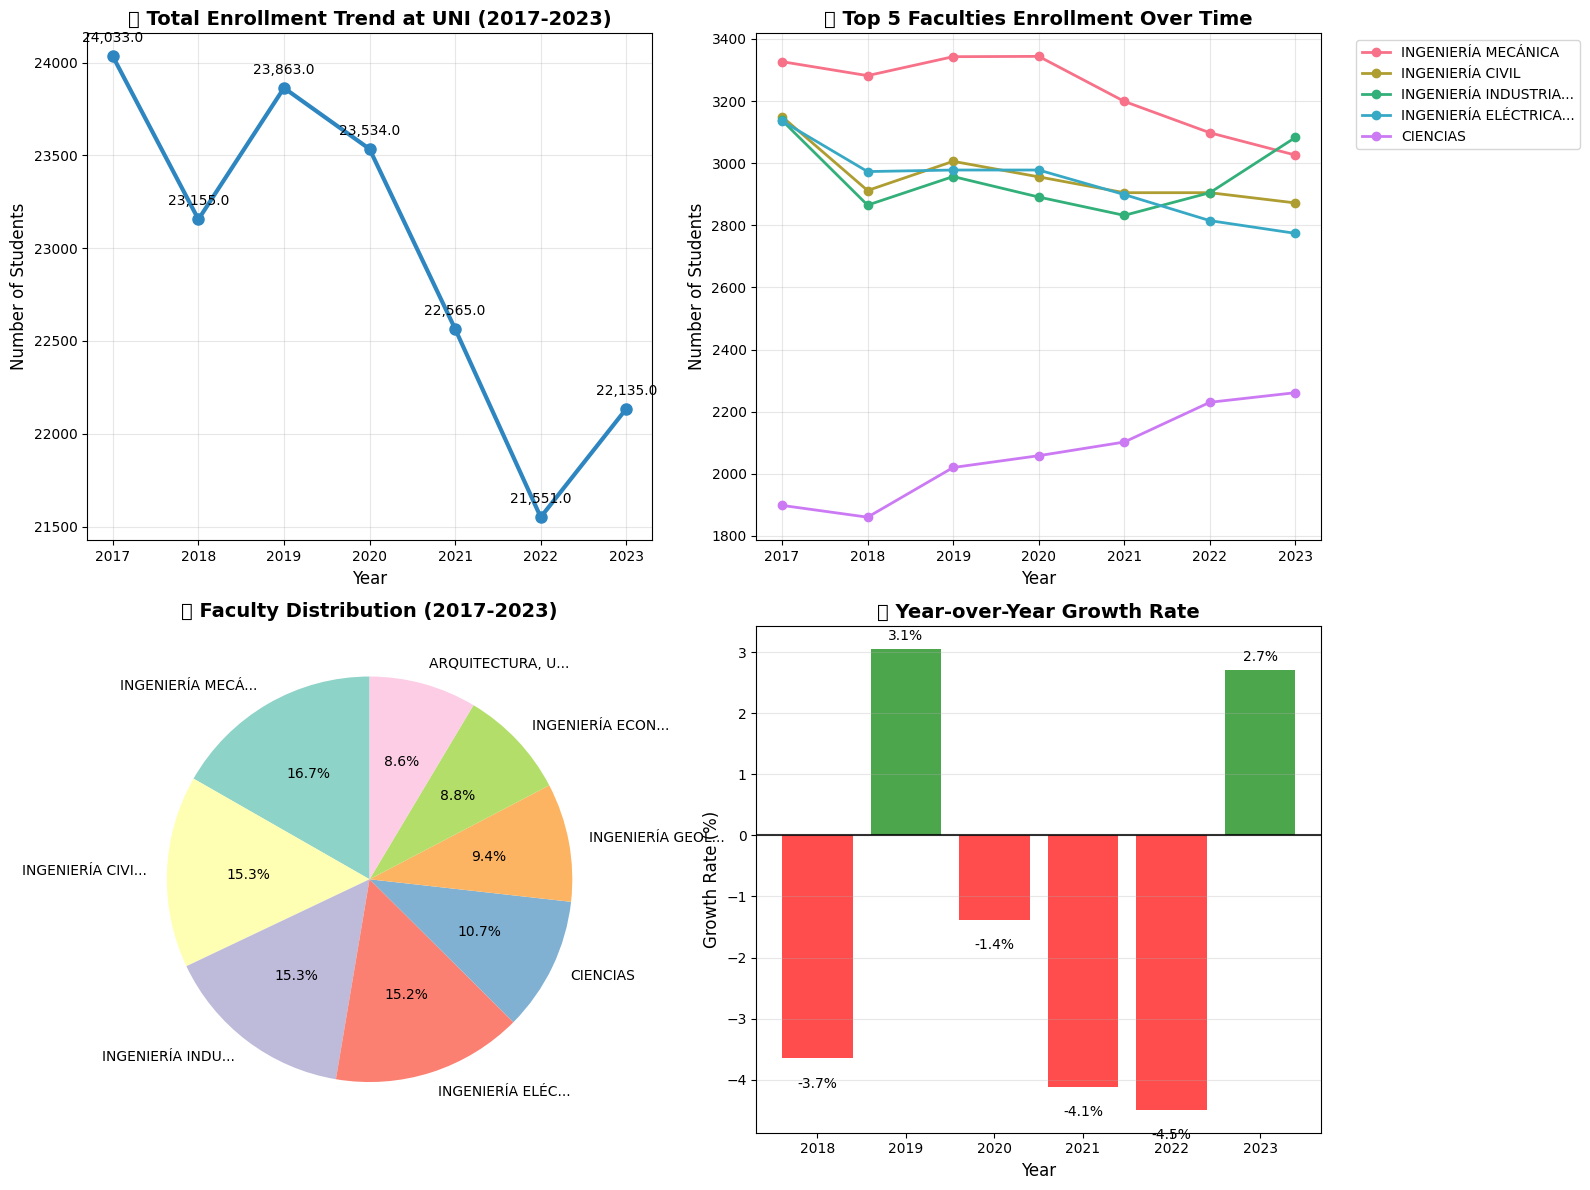

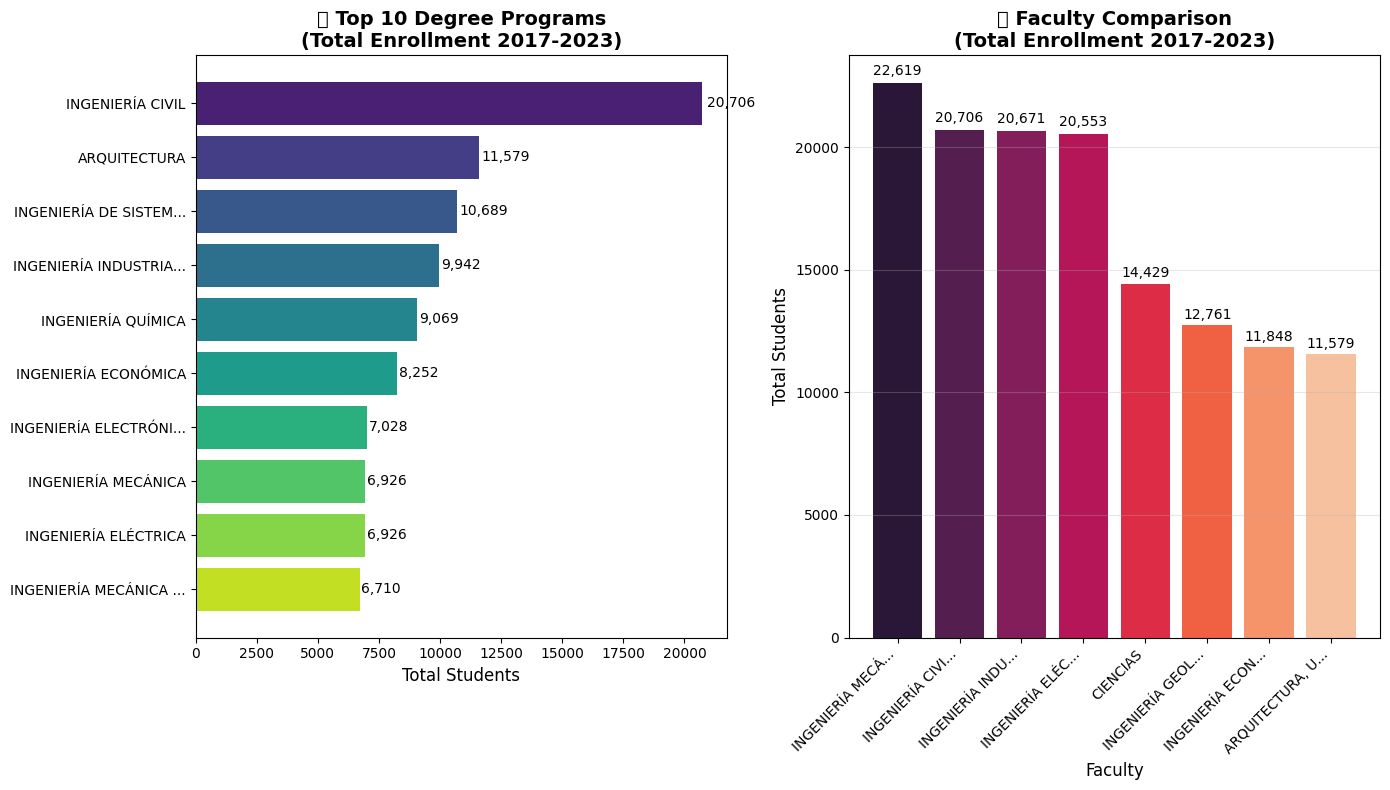

📊 Visualizations created successfully!


In [4]:
# Create comprehensive visualizations using matplotlib and seaborn
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall enrollment trend
ax1.plot(yearly_enrollment['YEAR'], yearly_enrollment['Total_Enrollment'], 
         marker='o', linewidth=3, markersize=8, color='#2E86C1')
ax1.set_title('📈 Total Enrollment Trend at UNI (2017-2023)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Students', fontsize=12)
ax1.grid(True, alpha=0.3)
for _, row in yearly_enrollment.iterrows():
    ax1.annotate(f"{row['Total_Enrollment']:,}", 
                (row['YEAR'], row['Total_Enrollment']), 
                textcoords="offset points", xytext=(0,10), ha='center')

# 2. Enrollment by top 5 faculties over time
top_5_faculties = faculty_summary.head(5)['FACULTAD'].tolist()
colors = sns.color_palette("husl", 5)

for i, faculty in enumerate(top_5_faculties):
    faculty_data = faculty_yearly[faculty_yearly['FACULTAD'] == faculty]
    faculty_short = faculty[:20] + '...' if len(faculty) > 20 else faculty
    ax2.plot(faculty_data['YEAR'], faculty_data['Enrollment'], 
            marker='o', linewidth=2, markersize=6, color=colors[i], label=faculty_short)

ax2.set_title('🏛️ Top 5 Faculties Enrollment Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Students', fontsize=12)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# 3. Faculty distribution pie chart (top 8)
top_8_faculties = faculty_summary.head(8)
faculty_names_short = [name[:15] + '...' if len(name) > 15 else name for name in top_8_faculties['FACULTAD']]
colors_pie = sns.color_palette("Set3", len(top_8_faculties))

wedges, texts, autotexts = ax3.pie(top_8_faculties['Total_Students'], 
                                  labels=faculty_names_short,
                                  autopct='%1.1f%%',
                                  colors=colors_pie,
                                  startangle=90)
ax3.set_title('🏛️ Faculty Distribution (2017-2023)', fontsize=14, fontweight='bold')

# 4. Year-over-year growth rate
growth_data = yearly_enrollment.dropna(subset=['Pct_Change'])
colors_growth = ['green' if x > 0 else 'red' for x in growth_data['Pct_Change']]
bars = ax4.bar(growth_data['YEAR'], growth_data['Pct_Change'], color=colors_growth, alpha=0.7)

ax4.set_title('📊 Year-over-Year Growth Rate', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Growth Rate (%)', fontsize=12)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.8)

# Add value labels on bars
for bar, value in zip(bars, growth_data['Pct_Change']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.1 if height > 0 else height - 0.3,
             f'{value:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

# Additional focused visualization for top programs
plt.figure(figsize=(14, 8))

# Top 10 degree programs
if program_columns:
    program_col = program_columns[0]
    top_programs = df_filtered.groupby(program_col).size().reset_index(name='Total_Students').sort_values('Total_Students', ascending=False).head(10)
    
    plt.subplot(1, 2, 1)
    program_names_short = [name[:20] + '...' if len(name) > 20 else name for name in top_programs[program_col]]
    bars = plt.barh(range(len(program_names_short)), top_programs['Total_Students'], 
                   color=sns.color_palette("viridis", len(program_names_short)))
    plt.title('🎓 Top 10 Degree Programs\n(Total Enrollment 2017-2023)', fontsize=14, fontweight='bold')
    plt.xlabel('Total Students', fontsize=12)
    plt.yticks(range(len(program_names_short)), program_names_short)
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, top_programs['Total_Students'])):
        plt.text(bar.get_width() + value*0.01, bar.get_y() + bar.get_height()/2, 
                f'{value:,}', va='center', fontsize=10)

# Faculty comparison
plt.subplot(1, 2, 2)
top_faculties_plot = faculty_summary.head(8)
faculty_names_short = [name[:15] + '...' if len(name) > 15 else name for name in top_faculties_plot['FACULTAD']]
bars = plt.bar(range(len(faculty_names_short)), top_faculties_plot['Total_Students'], 
               color=sns.color_palette("rocket", len(faculty_names_short)))
plt.title('🏛️ Faculty Comparison\n(Total Enrollment 2017-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Faculty', fontsize=12)
plt.ylabel('Total Students', fontsize=12)
plt.xticks(range(len(faculty_names_short)), faculty_names_short, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_faculties_plot['Total_Students'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01, 
             f'{value:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("📊 Visualizations created successfully!")

## 📝 Brief Analysis and Insights

### Key Findings from UNI Enrollment Data (2017-2023) 🔍

Based on our analysis of the enrollment data from the National University of Engineering, here are the main insights:

In [5]:
# Generate summary insights based on the data
total_2017 = yearly_enrollment[yearly_enrollment['YEAR'] == 2017]['Total_Enrollment'].iloc[0]
total_2023 = yearly_enrollment[yearly_enrollment['YEAR'] == 2023]['Total_Enrollment'].iloc[0]
overall_change = ((total_2023 - total_2017) / total_2017) * 100

print("🎯 EXECUTIVE SUMMARY:")
print("=" * 50)

print(f"\n📊 OVERALL ENROLLMENT TRENDS:")
print(f"   • 2017 Total Enrollment: {total_2017:,} students")
print(f"   • 2023 Total Enrollment: {total_2023:,} students")
print(f"   • Overall Change (2017-2023): {overall_change:+.1f}% {'📈' if overall_change > 0 else '📉'}")

# Find the year with highest and lowest enrollment
max_year = yearly_enrollment.loc[yearly_enrollment['Total_Enrollment'].idxmax()]
min_year = yearly_enrollment.loc[yearly_enrollment['Total_Enrollment'].idxmin()]

print(f"\n📈 PEAK PERFORMANCE:")
print(f"   • Highest enrollment: {max_year['Total_Enrollment']:,} students in {max_year['YEAR']} 🏆")
print(f"   • Lowest enrollment: {min_year['Total_Enrollment']:,} students in {min_year['YEAR']}")

# Faculty insights
largest_faculty = faculty_summary.iloc[0]
smallest_faculty = faculty_summary.iloc[-1]

print(f"\n🏛️ FACULTY HIGHLIGHTS:")
print(f"   • Largest Faculty: {largest_faculty['FACULTAD']}")
print(f"     └─ {largest_faculty['Total_Students']:,} students (2017-2023)")
print(f"   • Total Faculties: {len(faculty_summary)} different faculties")

# Growth patterns
positive_growth_years = len(yearly_enrollment[yearly_enrollment['Pct_Change'] > 0])
negative_growth_years = len(yearly_enrollment[yearly_enrollment['Pct_Change'] < 0])

print(f"\n📈 GROWTH PATTERNS:")
print(f"   • Years with growth: {positive_growth_years}")
print(f"   • Years with decline: {negative_growth_years}")

# Find the biggest year-over-year changes
if not yearly_enrollment['Pct_Change'].empty:
    max_growth = yearly_enrollment.loc[yearly_enrollment['Pct_Change'].idxmax()]
    max_decline = yearly_enrollment.loc[yearly_enrollment['Pct_Change'].idxmin()]
    
    print(f"   • Biggest growth: {max_growth['Pct_Change']:.1f}% in {max_growth['YEAR']} 🚀")
    print(f"   • Biggest decline: {max_decline['Pct_Change']:.1f}% in {max_decline['YEAR']} 📉")

print(f"\n💡 KEY INSIGHTS:")
if overall_change > 0:
    print(f"   ✅ UNI has experienced overall growth in enrollment over the period")
else:
    print(f"   ⚠️ UNI has experienced a decline in enrollment over the period")

print(f"   🎓 Engineering education remains popular with diverse faculty options")
print(f"   📊 Data shows year-to-year variations typical of higher education institutions")

print(f"\n📅 ANALYSIS PERIOD: 2017-2023 (7 years)")
print(f"📊 DATA SOURCE: PNDA Peru - Universidad Nacional de Ingeniería")
print(f"🔍 TOTAL RECORDS ANALYZED: {len(df_filtered):,}")

print("\n" + "="*50)
print("Analysis completed successfully! ✅")

🎯 EXECUTIVE SUMMARY:

📊 OVERALL ENROLLMENT TRENDS:
   • 2017 Total Enrollment: 24,033 students
   • 2023 Total Enrollment: 22,135 students
   • Overall Change (2017-2023): -7.9% 📉

📈 PEAK PERFORMANCE:
   • Highest enrollment: 24,033.0 students in 2017.0 🏆
   • Lowest enrollment: 21,551.0 students in 2022.0

🏛️ FACULTY HIGHLIGHTS:
   • Largest Faculty: INGENIERÍA MECÁNICA
     └─ 22,619 students (2017-2023)
   • Total Faculties: 11 different faculties

📈 GROWTH PATTERNS:
   • Years with growth: 2
   • Years with decline: 4
   • Biggest growth: 3.1% in 2019.0 🚀
   • Biggest decline: -4.5% in 2022.0 📉

💡 KEY INSIGHTS:
   ⚠️ UNI has experienced a decline in enrollment over the period
   🎓 Engineering education remains popular with diverse faculty options
   📊 Data shows year-to-year variations typical of higher education institutions

📅 ANALYSIS PERIOD: 2017-2023 (7 years)
📊 DATA SOURCE: PNDA Peru - Universidad Nacional de Ingeniería
🔍 TOTAL RECORDS ANALYZED: 160,836

Analysis completed su